# Module 7 Lab Assignment

In [18]:
import pandas as pd
import numpy as np

In this lab, you will work on a dataset about students' video activities. 

This dataset includes the counts about specific students' actions (such as play, pause, etc.) on different videos.

Import the data file (`video-activities.xlsx`) into a dataframe called `video_data`.

`[+1]`

In [19]:
video_data = pd.read_excel('video-activities.xlsx')
video_data

,StudentId,Day,Action,VideoId,Count
0,10.0,4.0,play,3.0,47.0
1,1.0,4.0,forward,1.0,37.0
2,2.0,26.0,pause,3.0,3.0
3,3.0,18.0,backward,1.0,33.0
4,2.0,10.0,caption,2.0,48.0
...,...,...,...,...,...
245,8.0,12.0,faster,33.0,14.0
246,7.0,25.0,slower,33.0,9.0
247,8.0,4.0,muted,31.0,23.0
248,2.0,12.0,unmuted,31.0,16.0


Print the dimensions of `video_data`.  You can use `shape` attribute.

In [20]:
video_data.shape

(250, 5)

Sort the data by `StudentId` and `Day` columns in an ascending order.

`[+3]`

In [21]:
video_data = video_data.sort_values(by=['StudentId','Day'] )
video_data

,StudentId,Day,Action,VideoId,Count
47,1.0,1.0,pause,4.0,13.0
127,1.0,1.0,unmuted,17.0,18.0
1,1.0,4.0,forward,1.0,37.0
215,1.0,4.0,backward,29.0,7.0
233,1.0,4.0,pause,30.0,17.0
...,...,...,...,...,...
23,10.0,29.0,faster,5.0,2.0
242,10.0,30.0,pause,32.0,47.0
209,10.0,NaN,slower,NaN,NaN
201,NaN,11.0,muted,27.0,50.0


### Cleaning Data

There might be some missing values in the data. Use the `isna` and `sum` functions together to print the count of NA (missing values) for each column.

`[+4]`

In [22]:
video_data.isna().sum()

StudentId     2
Day          12
Action        0
VideoId       8
Count        11
dtype: int64

First, drop the record where `StudentId` is missing. After the drop, please print the shape of the dataframe.

`[+3]`

In [23]:
video_data.dropna(subset = ['StudentId'], how = 'any' , inplace = True)
video_data.shape

(248, 5)

Next, please drop the rows where among the `Day`, `Action`, `VideoId` there are two or more missing values.

`[+4]`

In [24]:
video_data.dropna(subset = ['Day', 'Action', 'VideoId'], thresh=2, inplace = True)
video_data.shape

(245, 5)

There might be still missing values left in the `Day`, `Action`, `VideoId` columns. Replace these values using forward fill method.

`[+4]`

In [25]:
video_data['Day'].fillna(method='ffill', inplace = True)
video_data['Action'].fillna(method='ffill', inplace = True)
video_data['VideoId'].fillna(method='ffill', inplace = True)
video_data

,StudentId,Day,Action,VideoId,Count
47,1.0,1.0,pause,4.0,13.0
127,1.0,1.0,unmuted,17.0,18.0
1,1.0,4.0,forward,1.0,37.0
215,1.0,4.0,backward,29.0,7.0
233,1.0,4.0,pause,30.0,17.0
...,...,...,...,...,...
84,10.0,27.0,caption,11.0,47.0
104,10.0,27.0,slower,14.0,35.0
88,10.0,28.0,unmuted,10.0,31.0
23,10.0,29.0,faster,5.0,2.0


Once more, please display the NA counts for each column. Right now only the `Count` column should have 10 missing values.

`[+1]`

In [26]:
video_data.isna().sum()

StudentId     0
Day           0
Action        0
VideoId       0
Count        10
dtype: int64

Return a Serious object containing the id of the students whose corresponding `Count` value is missing.

`[+10]`

In [27]:
ids = video_data[video_data.isnull().any(axis=1)]
ids = ids.index
ids

Int64Index([59, 38, 140, 172, 100, 75, 11, 159, 6, 45], dtype='int64')

Now, you need to deal with the missing `Count` values. You need to fill a missing `Count` value of a student with the **mean** `Count` value of the same student. 

For this purpose you need to use a `for loop`.

`[+15]`

In [47]:
studentIds = video_data['StudentId'].values.tolist()
studentIds = list(set(studentIds))
for id in studentIds:  
  video_datass = video_data[video_data['StudentId']==id]
  average = video_datass['Count'].mean(skipna=True)
  #HINT: video_data['Count'].mean() will return the average of all count values. 
  #But you need the average/mean only for a specific student at each iteration.
  #That is, before .mean(), you need to filter video_data based on id.
  idss = video_data[video_data.isnull().any(axis=1)]
  idss = idss[idss['StudentId']==id]
  idss = idss.index
  #Now you can use the average value to fill the missing Count values for the student (at each iteration)
  #The second statement below (video_data.loc) does this. But, before that you need to define selectingRows properly.
  selectingRows = list(idss)#HINT: Select the rows (where Count is NA) and StudentId is equal to id.
  video_data.loc[selectingRows, 'Count'] = average
video_data = video_data.round(1)
video_data

,StudentId,Day,Action,VideoId,Count
47,1.0,1.0,pause,4.0,13.0
127,1.0,1.0,unmuted,17.0,18.0
1,1.0,4.0,forward,1.0,37.0
215,1.0,4.0,backward,29.0,7.0
233,1.0,4.0,pause,30.0,17.0
...,...,...,...,...,...
84,10.0,27.0,caption,11.0,47.0
104,10.0,27.0,slower,14.0,35.0
88,10.0,28.0,unmuted,10.0,31.0
23,10.0,29.0,faster,5.0,2.0


After replacing the missing values in the `Count` field, the following code should print `0`:

In [48]:
video_data.isna().sum()

StudentId    0
Day          0
Action       0
VideoId      0
Count        0
dtype: int64

### Merging DataFrames

Import the `video-module-match.xlsx` table into a dataframe called `video_modules`.

Then print the first 5 rows of `video_modules`.

This data indicates to which module of the course the videos belong to. 

`[+1]`

In [49]:
video_modules = pd.read_excel('video-module-match.xlsx')
video_modules.head()

,VideoId,ModuleId
0,1,1
1,2,1
2,3,1
3,1,1
4,3,1


Merge `video_data` with `video_modules`. 

The join operation should return all records from `video_data`, and the matching records from `video_modules`.

The resulting dataframe of join should be stored into `video_data_comp`. 

`[+10]`

In [51]:
video_data_comp = pd.merge(video_data, video_modules, on='VideoId')
#video_data_comp = video_data_comp.drop_duplicates()
video_data_comp = video_data_comp.reset_index()
video_data_comp = video_data_comp.drop(columns=['index'])
video_data_comp

,StudentId,Day,Action,VideoId,Count,ModuleId
0,1.0,1.0,pause,4.0,13.0,2
1,1.0,1.0,pause,4.0,13.0,2
2,1.0,1.0,pause,4.0,13.0,2
3,1.0,1.0,pause,4.0,13.0,2
4,1.0,1.0,pause,4.0,13.0,2
...,...,...,...,...,...,...
2073,9.0,12.0,caption,25.0,43.0,9
2074,9.0,12.0,caption,25.0,43.0,9
2075,9.0,12.0,caption,25.0,43.0,9
2076,9.0,12.0,caption,25.0,43.0,9


### Pivoting Tables & Generating Features

**In the rest of the code, you should use `video_data_comp` as the data source.**

#### First Pivot Table

You should use `pivot_table` function to create a table (named `pivot1`) that shows the *average* number of video actions for each student. 

That is each distinct video action should be a separate column whereas `StudentId` should be the row index. The values in the cells should be the average of the `Count` values. 

Your `pivot` table should look like the following image (where only two rows are displayed). The table shows how many times in average each student took each action.

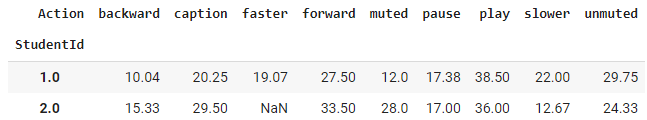

`[+10]`

In [37]:
pivot1 = video_data_comp.pivot_table(index = "StudentId", columns = "Action", values = "Count")
pivot1 = pivot1.round(2)
pivot1

Action,backward,caption,faster,forward,muted,pause,play,slower,unmuted
StudentId,,,,,,,,,
1.0,10.03,20.25,19.05,27.50,12.00,17.37,38.50,22.00,29.75
2.0,15.33,29.50,NaN,33.50,28.00,17.00,36.00,12.67,24.33
3.0,34.25,23.00,22.25,NaN,39.00,39.00,38.75,12.00,44.00
4.0,12.50,48.00,11.00,18.50,NaN,11.00,4.00,44.00,36.50
5.0,15.50,18.00,31.00,13.33,28.00,22.67,11.00,40.00,22.20
6.0,25.50,16.60,20.40,26.67,30.33,30.00,37.00,31.33,30.25
7.0,28.50,29.00,10.50,24.67,16.33,25.00,18.00,27.33,24.00
8.0,23.00,29.33,26.75,20.50,29.88,33.40,22.33,20.67,29.50
9.0,20.80,38.93,21.00,23.00,20.00,32.97,13.50,31.00,29.00


Print the total number for each action and mention the *most* and the `least` frequently taken actions.

In [40]:
total_number_of_actions = pivot1.sum()
print(total_number_of_actions)
print("Most frequently taken action:", max(total_number_of_actions))
print("Least frequently taken action:", min(total_number_of_actions))

Action
backward    207.41
caption     299.61
faster      173.80
forward     209.67
muted       224.54
pause       254.91
play        252.88
slower      266.10
unmuted     294.33
dtype: float64
Most frequently taken action: 299.61
Least frequently taken action: 173.79999999999998


Based on `pivot1`, generate a new column (i.e., variable), called `EngagedAll`, which should be `1` or `true` if students engaged in all types of video actions, and `0` or `false` otherwise.

`[+7]`

In [41]:
EngagedAll = pivot1.notna().all(axis = 1)
pivot1['EngagedAll'] = EngagedAll
pivot1

Action,backward,caption,faster,forward,muted,pause,play,slower,unmuted,EngagedAll
StudentId,,,,,,,,,,
1.0,10.03,20.25,19.05,27.50,12.00,17.37,38.50,22.00,29.75,True
2.0,15.33,29.50,NaN,33.50,28.00,17.00,36.00,12.67,24.33,False
3.0,34.25,23.00,22.25,NaN,39.00,39.00,38.75,12.00,44.00,False
4.0,12.50,48.00,11.00,18.50,NaN,11.00,4.00,44.00,36.50,False
5.0,15.50,18.00,31.00,13.33,28.00,22.67,11.00,40.00,22.20,True
6.0,25.50,16.60,20.40,26.67,30.33,30.00,37.00,31.33,30.25,True
7.0,28.50,29.00,10.50,24.67,16.33,25.00,18.00,27.33,24.00,True
8.0,23.00,29.33,26.75,20.50,29.88,33.40,22.33,20.67,29.50,True
9.0,20.80,38.93,21.00,23.00,20.00,32.97,13.50,31.00,29.00,True


#### Second Pivot Table

You should use `pivot_table` function to create a table (named `pivot2`) that shows the average number of video actions ***per each module*** for each student.

That is each distinct module (where the interacted videos belong to) should be a separate column whereas StudentId should be the row index. The values in the cells should be the average of the Count values.

Your `pivot2` table should look like the following image (where only two rows are displayed). The table shows how many times in average each student interacted with a video in each moudle.

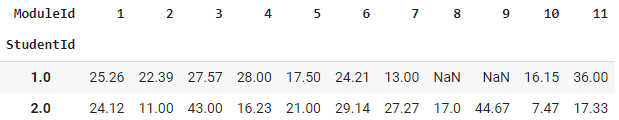

`[+10]`

In [89]:
pivot2 = video_data_comp.pivot_table(index = "StudentId", columns = "ModuleId", values = "Count")
pivot2 = pivot2.round(2)
pivot2

ModuleId,1,2,3,4,5,6,7,8,9,10,11
StudentId,,,,,,,,,,,
1.0,25.26,22.39,27.55,28.00,17.50,24.20,13.00,NaN,NaN,16.15,36.00
2.0,24.12,11.00,43.00,16.23,21.00,29.14,27.27,17.00,44.67,7.47,17.33
3.0,30.00,28.00,37.00,29.50,32.00,39.82,43.50,33.00,NaN,12.00,20.00
4.0,NaN,32.50,NaN,23.52,30.04,NaN,25.04,47.00,NaN,10.63,4.00
5.0,31.00,21.92,31.00,NaN,30.00,38.48,6.00,16.00,35.22,19.90,8.00
6.0,23.00,30.93,27.65,32.62,44.00,19.93,32.41,9.00,21.11,17.35,NaN
7.0,1.00,42.62,26.64,NaN,27.52,21.12,1.00,33.50,27.00,24.50,9.00
8.0,NaN,29.00,24.07,40.00,34.34,19.04,43.00,16.00,22.00,27.58,20.00
9.0,32.32,22.90,17.69,16.53,26.50,26.00,45.00,15.78,36.60,47.00,NaN


Find the average number of modules interacted by all students, and save this value into a variable called `avgModule`. The output should be 9.5.

`[+5]`


In [88]:
pivot2 = pivot2.dropna(axis = 1, how = 'any')
avgModule = pivot2.mean()
avgModule = avgModule.mean()
avgModule

26.624

Based on `pivot2`, generate a new column (i.e., variable), called `ModuleAboveAverage`, which should be `1` or `true` if the number of modules students engaged in is higher than `avgModule`, and `0` or `false` otherwise.

`[+7]`

In [93]:
avgModule1 = pivot2.mean()
ModuleAboveAverage = avgModule1>avgModule
pivot2['ModuleAboveAverage'] = ModuleAboveAverage
pivot2

ModuleId,1,2,3,4,5,6,7,8,9,10,11,ModuleAboveAverage
StudentId,,,,,,,,,,,,
1.0,25.26,22.39,27.55,28.00,17.50,24.20,13.00,NaN,NaN,16.15,36.00,False
2.0,24.12,11.00,43.00,16.23,21.00,29.14,27.27,17.00,44.67,7.47,17.33,False
3.0,30.00,28.00,37.00,29.50,32.00,39.82,43.50,33.00,NaN,12.00,20.00,True
4.0,NaN,32.50,NaN,23.52,30.04,NaN,25.04,47.00,NaN,10.63,4.00,True
5.0,31.00,21.92,31.00,NaN,30.00,38.48,6.00,16.00,35.22,19.90,8.00,True
6.0,23.00,30.93,27.65,32.62,44.00,19.93,32.41,9.00,21.11,17.35,NaN,False
7.0,1.00,42.62,26.64,NaN,27.52,21.12,1.00,33.50,27.00,24.50,9.00,False
8.0,NaN,29.00,24.07,40.00,34.34,19.04,43.00,16.00,22.00,27.58,20.00,False
9.0,32.32,22.90,17.69,16.53,26.50,26.00,45.00,15.78,36.60,47.00,NaN,True


Create a new dataframe, called `finalData` that should contain the new columns generated. 

`finalData` should look like the following image (in the image only the first 3 rows are displayed):

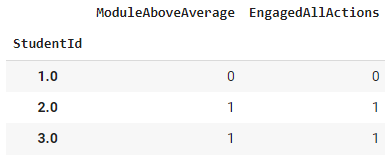

`[+5]`

In [94]:
finalData = pd.DataFrame()
finalData['ModuleAboveAverage'] = ModuleAboveAverage
finalData['EngagedAll'] = EngagedAll
finalData

,ModuleAboveAverage,EngagedAll
ModuleId,,
1,False,True
2,False,False
3,True,False
4,True,False
5,True,True
6,False,True
7,False,True
8,False,True
9,True,True
